In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [7]:
#Loading Data from the US Custom and Border Protection for FY2022 thru FY2025
df = pd.read_csv('/Users/billonario/Downloads/sbo-encounters-fy22-fy25-apr.csv')

In [9]:
#Review for field type
df.shape

(1820, 9)

In [11]:
#Review for number of Rows and Columns
df.head(5)

,Fiscal Year,Month Grouping,Month (abbv),Component,Demographic,Citizenship Grouping,Title of Authority,Encounter Type,Encounter Count
0,2022,FYTD,OCT,Office of Field Operations,Accompanied Minors,El Salvador,Title 42,Expulsions,1
1,2022,FYTD,OCT,Office of Field Operations,Accompanied Minors,Guatemala,Title 42,Expulsions,3
2,2022,FYTD,OCT,Office of Field Operations,Accompanied Minors,Honduras,Title 42,Expulsions,1
3,2022,FYTD,OCT,Office of Field Operations,Accompanied Minors,Mexico,Title 42,Expulsions,112
4,2022,FYTD,OCT,Office of Field Operations,Accompanied Minors,Mexico,Title 8,Inadmissibles,66


In [13]:
#Reviewing column names
df.columns

Index(['Fiscal Year', 'Month Grouping', 'Month (abbv)', 'Component',
       'Demographic', 'Citizenship Grouping', 'Title of Authority',
       'Encounter Type', 'Encounter Count'],
      dtype='object')

In [15]:
#Reviewing data types
df.dtypes

Fiscal Year             object
Month Grouping          object
Month (abbv)            object
Component               object
Demographic             object
Citizenship Grouping    object
Title of Authority      object
Encounter Type          object
Encounter Count          int64
dtype: object

In [17]:
#Review top level quantifiable information
df.describe()

,Encounter Count
count,1820.000000
mean,4056.250000
std,9814.087485
min,1.000000
25%,66.750000
50%,635.000000
75%,3037.250000
max,97661.000000


In [21]:
#Rename Columns to remove spaces
df = df.rename(columns={'Fiscal Year':'Fiscal_Year', 'Month Grouping':'Month_Grouping', 'Month (abbv)':'Month_Abreviation',
                'Citizenship Grouping':'Citizenship_Grouping', 'Title of Authority':'Title_of_Authority',
                'Encounter Type':'Encounter_Type', 'Encounter Count':'Encounter_Count'})

In [23]:
#Reviewing for total number of missing values per field; No missing values on this dataset
df.isna().sum()

Fiscal_Year             0
Month_Grouping          0
Month_Abreviation       0
Component               0
Demographic             0
Citizenship_Grouping    0
Title_of_Authority      0
Encounter_Type          0
Encounter_Count         0
dtype: int64

In [25]:
#Reviewing for duplicate records on dataset; No duplicate records identified.
df.loc[df.duplicated()]

,Fiscal_Year,Month_Grouping,Month_Abreviation,Component,Demographic,Citizenship_Grouping,Title_of_Authority,Encounter_Type,Encounter_Count


In [27]:
df.loc[df.duplicated(subset=['Citizenship_Grouping'])].head(5)

,Fiscal_Year,Month_Grouping,Month_Abreviation,Component,Demographic,Citizenship_Grouping,Title_of_Authority,Encounter_Type,Encounter_Count
4,2022,FYTD,OCT,Office of Field Operations,Accompanied Minors,Mexico,Title 8,Inadmissibles,66
6,2022,FYTD,OCT,Office of Field Operations,Accompanied Minors,Other,Title 8,Inadmissibles,2
7,2022,FYTD,OCT,Office of Field Operations,FMUA,El Salvador,Title 8,Inadmissibles,12
8,2022,FYTD,OCT,Office of Field Operations,FMUA,Guatemala,Title 8,Inadmissibles,14
9,2022,FYTD,OCT,Office of Field Operations,FMUA,Honduras,Title 8,Inadmissibles,34


In [29]:
df.query('Citizenship_Grouping == "El Salvador"')

,Fiscal_Year,Month_Grouping,Month_Abreviation,Component,Demographic,Citizenship_Grouping,Title_of_Authority,Encounter_Type,Encounter_Count
0,2022,FYTD,OCT,Office of Field Operations,Accompanied Minors,El Salvador,Title 42,Expulsions,1
7,2022,FYTD,OCT,Office of Field Operations,FMUA,El Salvador,Title 8,Inadmissibles,12
12,2022,FYTD,OCT,Office of Field Operations,Single Adults,El Salvador,Title 42,Expulsions,14
13,2022,FYTD,OCT,Office of Field Operations,Single Adults,El Salvador,Title 8,Inadmissibles,7
22,2022,FYTD,OCT,Office of Field Operations,UAC,El Salvador,Title 8,Inadmissibles,8
...,...,...,...,...,...,...,...,...,...
1795,2025 (FYTD),FYTD,OCT,Office of Field Operations,Single Adults,El Salvador,Title 8,Inadmissibles,575
1800,2025 (FYTD),FYTD,OCT,Office of Field Operations,UAC,El Salvador,Title 8,Inadmissibles,11
1805,2025 (FYTD),FYTD,OCT,U.S. Border Patrol,FMUA,El Salvador,Title 8,Apprehensions,756
1810,2025 (FYTD),FYTD,OCT,U.S. Border Patrol,Single Adults,El Salvador,Title 8,Apprehensions,763


In [31]:
#Summarizing data using pivot table method.
df.pivot_table(
    values=None,
    index= 'Fiscal_Year',
    columns= 'Month_Abreviation',
    aggfunc = {'Encounter_Count':'sum'},
    fill_value=0
)

Encounter_Count                                          \
Month_Abreviation             APR     AUG     DEC     FEB     JAN     JUL   
Fiscal_Year                                                                 
2022                       235785  204087  179253  166010  154874  200162   
2023                       211992  232963  252315  156630  157358  183479   
2024                       179737  107473  301981  189913  176195  104100   
2025 (FYTD)                 12035       0   96037   11708   61448       0   

                                                                   
Month_Abreviation     JUN     MAR     MAY     NOV     OCT     SEP  
Fiscal_Year                                                        
2022               207834  222574  241136  174845  164837  227547  
2023               144556  193249  206690  235173  231529  269735  
2024               130415  189359  170716  242399  240927  101790  
2025 (FYTD)             0   11019       0   94189  106321       0

In [73]:
#Cleaning Fiscal Year to remove (FYTD) from 2025
df['Fiscal_Year']=df['Fiscal_Year'].str.replace(' (FYTD)','')

In [91]:
#Converting Fiscal Year from object to integer
df['Fiscal_Year']=pd.to_numeric(df['Fiscal_Year'], errors='coerce', downcast='integer')

In [35]:
#Re-running summary after cleaning Fiscal_Year
df.pivot_table(
    values=None,
    index= 'Fiscal_Year',
    columns= 'Month_Abreviation',
    aggfunc = {'Encounter_Count':'sum'},
    fill_value=0
)

Encounter_Count                                          \
Month_Abreviation             APR     AUG     DEC     FEB     JAN     JUL   
Fiscal_Year                                                                 
2022                       235785  204087  179253  166010  154874  200162   
2023                       211992  232963  252315  156630  157358  183479   
2024                       179737  107473  301981  189913  176195  104100   
2025                        12035       0   96037   11708   61448       0   

                                                                   
Month_Abreviation     JUN     MAR     MAY     NOV     OCT     SEP  
Fiscal_Year                                                        
2022               207834  222574  241136  174845  164837  227547  
2023               144556  193249  206690  235173  231529  269735  
2024               130415  189359  170716  242399  240927  101790  
2025                    0   11019       0   94189  106321       0

In [37]:
# Mapping month abbreviations to numerical values
month_mapping = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
                 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}

In [39]:
# Convert month abbreviation to numerical value
df['month_num'] = df['Month_Abreviation'].map(month_mapping)

In [41]:
df['month_day'] = df['month_day']=1

In [43]:
# Create the date column
df['date'] = pd.to_datetime(df[['Fiscal_Year', 'month_num','month_day']].rename(columns={'Fiscal_Year':'year', 'month_num':'month','month_day':'day'}))

In [69]:
df.pivot_table(
    values=None,
    index= 'Fiscal_Year',
    columns= 'month_num',
    aggfunc = {'Encounter_Count':'sum'},
    fill_value=0
)

Encounter_Count                                                  \
month_num                1       2       3       4       5       6       7    
Fiscal_Year                                                                   
2022                 154874  166010  222574  235785  241136  207834  200162   
2023                 157358  156630  193249  211992  206690  144556  183479   
2024                 176195  189913  189359  179737  170716  130415  104100   
2025                  61448   11708   11019   12035       0       0       0   

                                                     
month_num        8       9       10      11      12  
Fiscal_Year                                          
2022         204087  227547  164837  174845  179253  
2023         232963  269735  231529  235173  252315  
2024         107473  101790  240927  242399  301981  
2025              0       0  106321   94189   96037

In [47]:
df.query('Fiscal_Year=="2025" & month_num==[10,11,12]')

,Fiscal_Year,Month_Grouping,Month_Abreviation,Component,Demographic,Citizenship_Grouping,Title_of_Authority,Encounter_Type,Encounter_Count,month_num,month_day,date
1628,2025,FYTD,DEC,Office of Field Operations,Accompanied Minors,Guatemala,Title 8,Inadmissibles,1,12,1,2025-12-01
1629,2025,FYTD,DEC,Office of Field Operations,Accompanied Minors,Honduras,Title 8,Inadmissibles,1,12,1,2025-12-01
1630,2025,FYTD,DEC,Office of Field Operations,Accompanied Minors,Mexico,Title 8,Inadmissibles,98,12,1,2025-12-01
1631,2025,FYTD,DEC,Office of Field Operations,Accompanied Minors,Other,Title 8,Inadmissibles,29,12,1,2025-12-01
1632,2025,FYTD,DEC,Office of Field Operations,FMUA,El Salvador,Title 8,Inadmissibles,645,12,1,2025-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1815,2025,FYTD,OCT,U.S. Border Patrol,UAC,El Salvador,Title 8,Apprehensions,491,10,1,2025-10-01
1816,2025,FYTD,OCT,U.S. Border Patrol,UAC,Guatemala,Title 8,Apprehensions,1695,10,1,2025-10-01
1817,2025,FYTD,OCT,U.S. Border Patrol,UAC,Honduras,Title 8,Apprehensions,1201,10,1,2025-10-01
1818,2025,FYTD,OCT,U.S. Border Patrol,UAC,Mexico,Title 8,Apprehensions,1987,10,1,2025-10-01


In [49]:
df = df.sort_values('month_num')

In [51]:
#Storing Pivot_table summary as summary1 for plotting.
summary1 = df.pivot_table(
    values='Encounter_Count',
    index= ['month_num','Month_Abreviation'],
    columns= 'Fiscal_Year',
    aggfunc = 'sum',
    fill_value=0
)

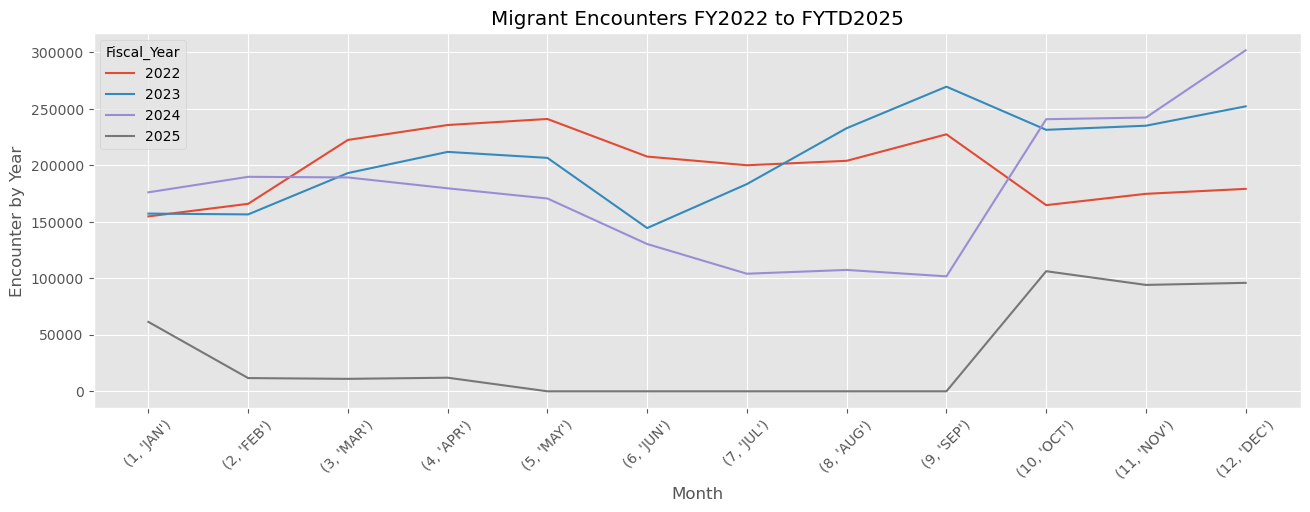

In [53]:
# Plot the pivot table
ax = summary1.plot(figsize=(13, 5))

# Set the x-axis labels to the values of the 'MONTH' column
x = summary1.index
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x)

# Adjusting plot to fit and include all lables
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Migrant Encounters FY2022 to FYTD2025')
plt.xlabel('Month')
plt.ylabel('Encounter by Year')
plt.show()

In [55]:
summary2 = df.pivot_table(
    values='Encounter_Count',
    index= ['Fiscal_Year'],
    columns= 'Demographic',
    aggfunc = 'sum',
    fill_value=0
)

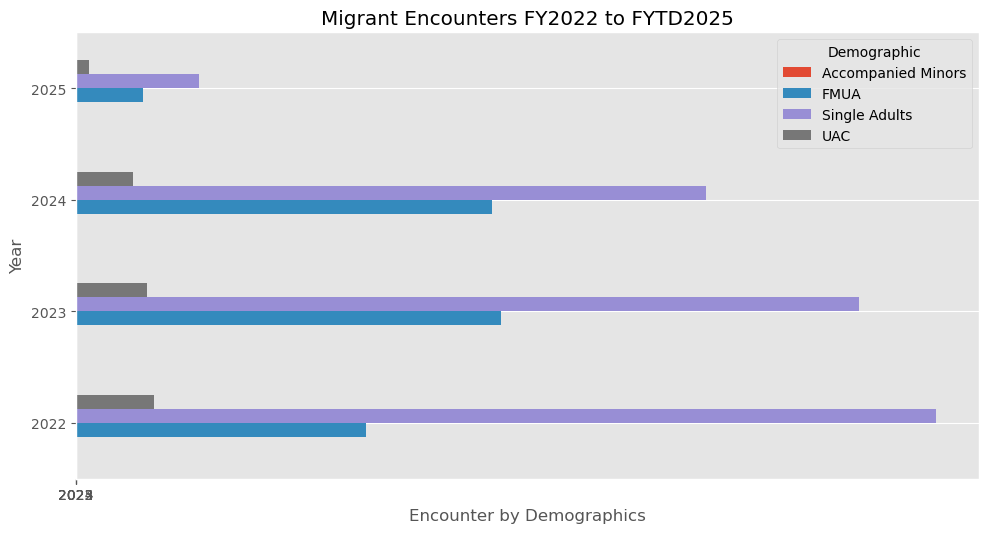

In [97]:
# Plot the pivot table
ax = summary2.plot.barh(figsize=(10, 5))

# Set the x-axis labels to the values of the 'MONTH' column
x = summary2.index
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x)

# Adjusting plot to fit and include all lables
plt.xticks(rotation=0)
plt.tight_layout()
plt.title('Migrant Encounters FY2022 to FYTD2025')
plt.xlabel('Encounter by Demographics')
plt.ylabel('Year')
plt.show()

In [59]:
summary3 = df.pivot_table(
    values='Encounter_Count',
    index= ['Fiscal_Year'],
    columns= 'Encounter_Type',
    aggfunc = 'sum',
    fill_value=0
)

<Axes: title={'center': 'Encounters by Type'}, xlabel='Encounter_Count', ylabel='Fiscal_Year'>

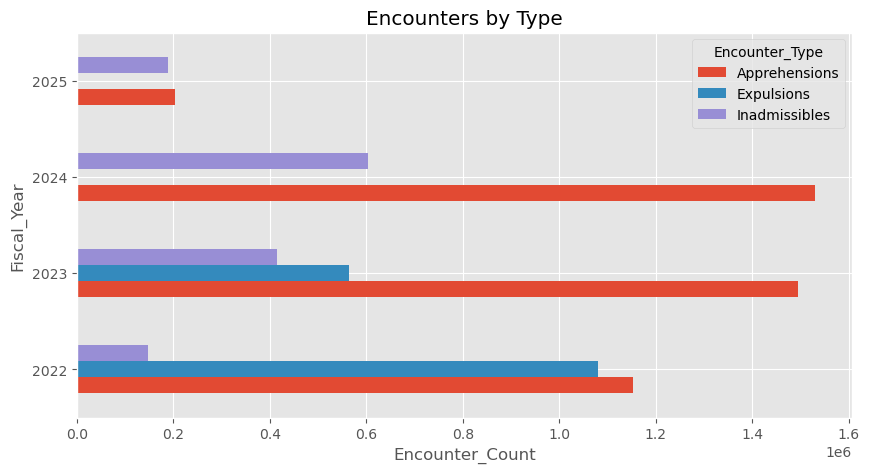

In [95]:
summary3.plot(kind='barh', title='Encounters by Type', figsize=(10,5), xlabel='Encounter_Count')

In [93]:
df.dtypes

Fiscal_Year                      int16
Month_Grouping                  object
Month_Abreviation               object
Component                       object
Demographic                     object
Citizenship_Grouping            object
Title_of_Authority              object
Encounter_Type                  object
Encounter_Count                  int64
month_num                        int64
month_day                        int64
date                    datetime64[ns]
dtype: object